In [74]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten, Dropout, BatchNormalization, MaxPool2D
from tensorflow.keras.models import Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [53]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=0.2, width_shift_range=0.2, horizontal_flip=True, shear_range=0.1)

In [19]:
Ytrain = Ytrain.flatten()
Ytest = Ytest.flatten()

In [42]:
N = Xtrain.shape[0]
K = len(set(Ytrain) | set(Ytest))
batch_size = 32

In [25]:
Xtrain.shape

(50000, 32, 32, 3)

In [76]:
i = Input(shape=(32, 32, 3), batch_size=batch_size)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D((2, 2), 2)(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D((2, 2), 2)(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D((2, 2), 2)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

In [77]:
model = Model(i, x)

In [78]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [79]:
train_generator = data_generator.flow(Xtrain, Ytrain, batch_size=batch_size)

In [80]:
steps_per_epoch = N // batch_size

In [81]:
r = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=30, steps_per_epoch=steps_per_epoch)

Epoch 1/30
1562/1562 [==============================] - 25s 11ms/step - loss: 1.2605 - accuracy: 0.5634 - val_loss: 0.9467 - val_accuracy: 0.6752
Epoch 2/30
1562/1562 [==============================] - 18s 11ms/step - loss: 0.8042 - accuracy: 0.7194 - val_loss: 0.7499 - val_accuracy: 0.7419
Epoch 3/30
1562/1562 [==============================] - 17s 11ms/step - loss: 0.6547 - accuracy: 0.7731 - val_loss: 0.6228 - val_accuracy: 0.7874
Epoch 4/30
1562/1562 [==============================] - 15s 10ms/step - loss: 0.5436 - accuracy: 0.8124 - val_loss: 0.7636 - val_accuracy: 0.7547
Epoch 5/30
1562/1562 [==============================] - 18s 11ms/step - loss: 0.4550 - accuracy: 0.8423 - val_loss: 0.6655 - val_accuracy: 0.7927
Epoch 6/30
1562/1562 [==============================] - 15s 10ms/step - loss: 0.3818 - accuracy: 0.8680 - val_loss: 0.6056 - val_accuracy: 0.8108
Epoch 7/30
1562/1562 [==============================] - 16s 10ms/step - loss: 0.3227 - accuracy: 0.8872 - val_loss: 0.6378 -

1562/1562 [==============================] - 3s 2ms/step - loss: 0.0755 - accuracy: 0.9742 - val_loss: 0.7741 - val_accuracy: 0.8387


In [82]:
r = model.fit(train_generator, validation_data=(Xtest, Ytest), epochs=30, steps_per_epoch=steps_per_epoch)

Epoch 1/30
1562/1562 [==============================] - 49s 30ms/step - loss: 0.8095 - accuracy: 0.7349 - val_loss: 0.6698 - val_accuracy: 0.7904
Epoch 2/30
1562/1562 [==============================] - 50s 32ms/step - loss: 0.6533 - accuracy: 0.7807 - val_loss: 0.5391 - val_accuracy: 0.8156
Epoch 3/30
1562/1562 [==============================] - 48s 31ms/step - loss: 0.5865 - accuracy: 0.8011 - val_loss: 0.4825 - val_accuracy: 0.8368
Epoch 4/30
1562/1562 [==============================] - 45s 29ms/step - loss: 0.5573 - accuracy: 0.8111 - val_loss: 0.4856 - val_accuracy: 0.8404
Epoch 5/30
1562/1562 [==============================] - 46s 29ms/step - loss: 0.5290 - accuracy: 0.8199 - val_loss: 0.4438 - val_accuracy: 0.8499
Epoch 6/30
1562/1562 [==============================] - 44s 28ms/step - loss: 0.5120 - accuracy: 0.8250 - val_loss: 0.4702 - val_accuracy: 0.8419
Epoch 7/30
1562/1562 [==============================] - 45s 29ms/step - loss: 0.4918 - accuracy: 0.8341 - val_loss: 0.4580 -

In [83]:
r = model.history

In [84]:
loss = r.history['loss']
val_loss = r.history['val_loss']
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

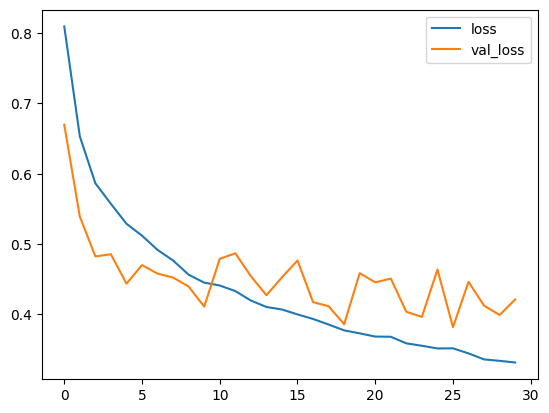

In [85]:
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()

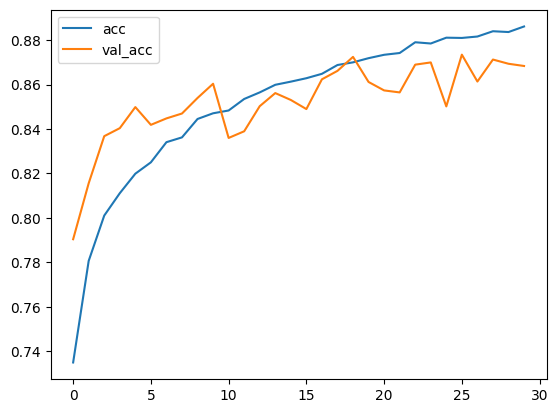

In [86]:
plt.plot(acc, label='acc')
plt.plot(val_acc, label='val_acc')
plt.legend()
plt.show()